In [1]:
import os
import re
import pandas as pd

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [5]:
df = pd.read_parquet(os.path.join("data","cnb_ceska_proza.parquet"))

In [9]:
len(df)

47419

In [11]:
df = df.merge(pd.read_parquet(os.path.join("data","cnb_vyber.parquet")), left_index=True, right_index=True, how="left")

In [12]:
len(df)

47419

In [21]:
df = df.sort_values(by='rok')
df = df.drop_duplicates(subset=['autorstvo','titul'], keep='first')

In [23]:
len(df)

47419

In [67]:
def nakladatelstvo(radek):
    nakladatel = None
    for sloupec in ['928_a','260_b','264_b']:
        try:
            nakladatel = radek[sloupec][0].strip()
        except:
            pass
    if isinstance(nakladatel, str):
        if nakladatel[-1] == ',':
            return nakladatel[:-1]

In [69]:
df['nakladatelstvi'] = df.apply(lambda row: nakladatelstvo(row), axis=1)

In [71]:
df['nakladatelstvi'].sample(20)

001
nkc20091930907                                       Plejáda
nkc20122391341                                          Rebo
cpk20031244956                                        Listen
nkc20132473976                                      Albatros
bk195505241                            Okresní národní výbor
nkc20193081792                                    Nová Forma
nkc20182996394                                        Paseka
bk194002236                                Zmatlík a Palička
cpk20010991355                                          Nava
nkc20203215459                                      Repronis
nkc20193084910                               Euromedia Group
nkc20213366406                                      Epsillon
nkc20122344428                                        xPrint
cpk20010979920               Pražská vydavatelská společnost
nkc20213361806                                       Alpress
nkc20183003431                    Stanislav Juhaňák - Triton
nkc20152757476    Ji

In [87]:
df[df['rok'] >= 2023].groupby("nakladatelstvi").size().nlargest(10)

nakladatelstvi
Pointa               102
MOBA                  90
Euromedia Group       67
Nová Forma            52
Ikar                  43
Powerprint s.r.o.     43
Bambook               41
Host                  37
CPress                36
Motto                 35
dtype: int64

In [89]:
df[df['nakladatelstvi'] == 'CPress']

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,nakladatelstvi,kolikata_kniha
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20132497944,2013.0,"Já, zlatý retrívr",Materna Dan,js20031215004,131030s2013 xr a g 000 j cze,[978-80-264-0269-5],None,[(váz.)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-32, 636.7, (0:82-32), (084.12)]","[aut, pht]",[js20031215004],"[Materna, Dan,]",[1971-],None,"[Já, zlatý retrívr :]","[Dan Materna, Veronika Souralová]]",None,None,None,[1. vyd.],None,[V Brně :],"[CPress,]",[2013],None,None,None,None,None,None,None,[88 s. :],[barev. il. ;],[31 cm],None,None,None,None,None,None,None,None,"[zlatý retrívr, golden retriever]",None,None,None,None,None,"[české příběhy, fotografické publikace, Czech ...",[aut],[mzk2004261174],"[Souralová, Veronika,]",[1968-],None,None,None,None,None,[Albatros Media - CPress],None,nam a22 a 4500,CPress,1.0
nkc20152652304,2014.0,Veselí kamarádi,Dudek Adolf,jn20010309777,150113s2014 xr a a 000 1 cze,[978-80-264-0600-6],None,[(leporelo)],None,None,None,None,[821-93],[Literatura pro děti a mládež (beletrie)],"[821-93, (0.025.2)]",[ill],[jn20010309777],"[Dudek, Adolf,]",[1964-],None,[Veselí kamarádi :],[Adolf Dudek],None,None,"[Dětský metr - veselí kamarádi, Dětský metr]",None,None,[[Praha] :],"[CPress,]",[c2014],None,None,None,None,None,None,None,[[12] s. :],[vše barev. il. ;],[15 x 16 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[publikace pro děti, leporela, children's lite...",None,None,None,None,None,None,None,None,None,[Albatros Media - CPress],None,nam a22 a 4500,CPress,28.0
nkc20152652305,2014.0,Zvířátka,Dudek Adolf,jn20010309777,150113s2014 xr a a 000 1 cze,[978-80-264-0601-3],None,[(leporelo)],None,None,None,None,[821-93],[Literatura pro děti a mládež (beletrie)],"[821-93, (0.025.2)]",[ill],[jn20010309777],"[Dudek, Adolf,]",[1964-],None,[Zvířátka :],[Adolf Dudek],None,None,"[Dětský mter - zvířátka, Dětský metr]",None,None,[[Praha] :],"[CPress,]",[c2014],None,None,None,None,None,None,None,[[12] s. :],[vše barev. il. ;],[15 x 16 cm],None,None,[Kartonové listy],None,None,None,None,None,None,None,None,None,None,None,"[publikace pro děti, leporela, children's lite...",None,None,None,None,None,None,None,None,None,[Albatros Media - CPress],None,nam a22 a 4500,CPress,29.0
nkc20142624601,2014.0,Kam chodí spát Usínáček,Ciprová Oldřiška,xx0002400,140915s2014 xr a a 000 f cze,[978-80-264-0497-2],None,[(váz.)],None,None,None,None,"[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[821.162.3-34, 821-93, (0:82-34)]",[aut],[xx0002400],"[Ciprová, Oldřiška,]",[1979-],None,[Kam chodí spát Usínáček :],[Oldřiška Ciprová ; ilustrace Lenka Němcová],None,None,"[Pohádky do postýlky, Kam chodí spát Usínáček ...",[1. vyd.],None,[Brno :],"[CPress,]",[2014],None,None,None,None,None,None,None,[58 s. :],[barev. il. ;],[23 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[české pohádky, publikace pro děti, Czech fair...",[ill],[ola2014840634],"[Němcová, Lenka,]",[1977-],None,None,None,None,None,[Albatros Media - CPress],None,nam a22 a 4500,CPress,10.0
nkc20142627079,2014.0,O zatoulaném sluníčku,Neubauerová Zuzana,mzk2008486446,140926s2014 xr a b 000 j cze,[978-80-264-0505-4],None,[(váz.)],None,None,None,None,"[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[821.162.3-32, 821-93, (0:82-32)]",[aut],[mzk2008486446],"[Neubauerová, Zuzana,]",[1979-],None,[O zatoulaném sluníčku /],[Zuzana Neubauerová ; ilustrace Adolf Dudek],None,None,None,[1. vyd.],None,[Brno :],"[CPress,]",[2014],None,None

In [79]:
df['kolikata_kniha'] = df.groupby('autorstvo_kod').cumcount() + 1

In [81]:
df[df['autorstvo'].isin(['Kašpárek Michal'])]

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,nakladatelstvi,kolikata_kniha
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20182997195,2018.0,Hry bez hranic,Kašpárek Michal,jx20100301005,180516s2018 xr g 000 j cze,[978-80-7549-850-2],None,[(vázáno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-32, (0:82-323.1)]",[aut],[jx20100301005],"[Kašpárek, Michal,]",[1984-],None,[Hry bez hranic /],[Michal Kašpárek],None,None,None,[Vydání první],None,None,None,None,None,None,None,[Praha :],"[Euromedia,]",[2018],[1],[156 stran ;],None,[19 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[české novely, satirické novely, Czech novella...",None,None,None,None,None,None,None,None,None,[Euromedia Group - Listen],None,nam a22 i 4500,Euromedia,1.0
nkc20233549616,2023.0,Fosilie,Kašpárek Michal,jx20100301005,230925s2023 xr g 000 f cze,[978-80-7637-400-3],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],[jx20100301005],"[Kašpárek, Michal,]",[1984-],None,[Fosilie /],[Michal Kašpárek],None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Praze :],"[Paseka,]",[2023],[1],[183 stran ;],None,[20 cm],None,None,None,"[Tři generace, tři životní názory a postoje. D...","[Děda, bývalý učitel tělocviku, vnímá, že svět...",None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,Paseka,2.0


In [105]:
import plotly.graph_objects as go
from io import StringIO

In [235]:
zajima_nas = ['Nová Forma','Euromedia Group','Albatros','MOBA','Fragment','Motto','Host','Argo','Ikar','Vyšehrad','Paseka','Listen']

In [211]:
vyber.groupby('nakladatelstvi').size().nlargest(60)

nakladatelstvi
Nová Forma                                  319
Euromedia Group                             177
Albatros                                    146
MOBA                                        134
Fragment                                    126
Motto                                       111
Host                                        104
Bambook                                      98
CPress                                       95
Pointa                                       91
Klika                                        90
Argo                                         79
Petrklíč                                     77
Stanislav Juhaňák - Triton                   77
Ikar                                         74
ELTISK                                       72
Powerprint                                   65
XYZ                                          63
Cosmopolis                                   62
Martin Koláček - E-knihy jedou               62
E-knihy jedou            

In [237]:
vyber = df[(df['rok'] >= 2014) & (df['kolikata_kniha'].isin([1,2]))]
vyber = df[df['autorstvo_kod'].isin(vyber[vyber['kolikata_kniha'] == 2]['autorstvo_kod'].to_list())]
vyber = vyber[vyber['nakladatelstvi'].isin(zajima_nas)]
len(vyber)

1341

In [217]:
prvni = pd.Series(vyber.groupby("autorstvo_kod")['nakladatelstvi'].first(), name='prvni')

In [135]:
druhe = pd.Series(vyber.groupby("autorstvo_kod")['nakladatelstvi'].last(), name='druhe')

In [139]:
presuny = pd.DataFrame([prvni, druhe]).transpose()

In [141]:
presuny

,prvni,druhe
autorstvo_kod,,
av2014811888,Motto,Motto
av2014840216,Labyrint,Labyrint
av2014847183,Pendulum,Petr Cerman
av2014851022,Alfa-Omega,Pointa
av2014851321,Petrklíč,Petrklíč
...,...,...
xx0314038,Nakladatelství TN,Nakladatelství TN
xx0315787,Bughead Records,Host
xx0316207,Nová Forma,Pointa


In [239]:
grouped = vyber.sort_values('kolikata_kniha').groupby('autorstvo')

In [241]:
source = []
target = []
value = []

In [243]:
for author, group in grouped:
    if len(group) >= 2:
        first_book = group.iloc[0]
        second_book = group.iloc[1]
        
        source.append(first_book['nakladatelstvi'])
        target.append(second_book['nakladatelstvi'])
        value.append(1)

In [245]:
first_publishers = list(set(source))
second_publishers = list(set(target))

In [247]:
node_labels = first_publishers + second_publishers

# Map publishers to indices
source_indices = [first_publishers.index(s) for s in source]
target_indices = [len(first_publishers) + second_publishers.index(t) for t in target]

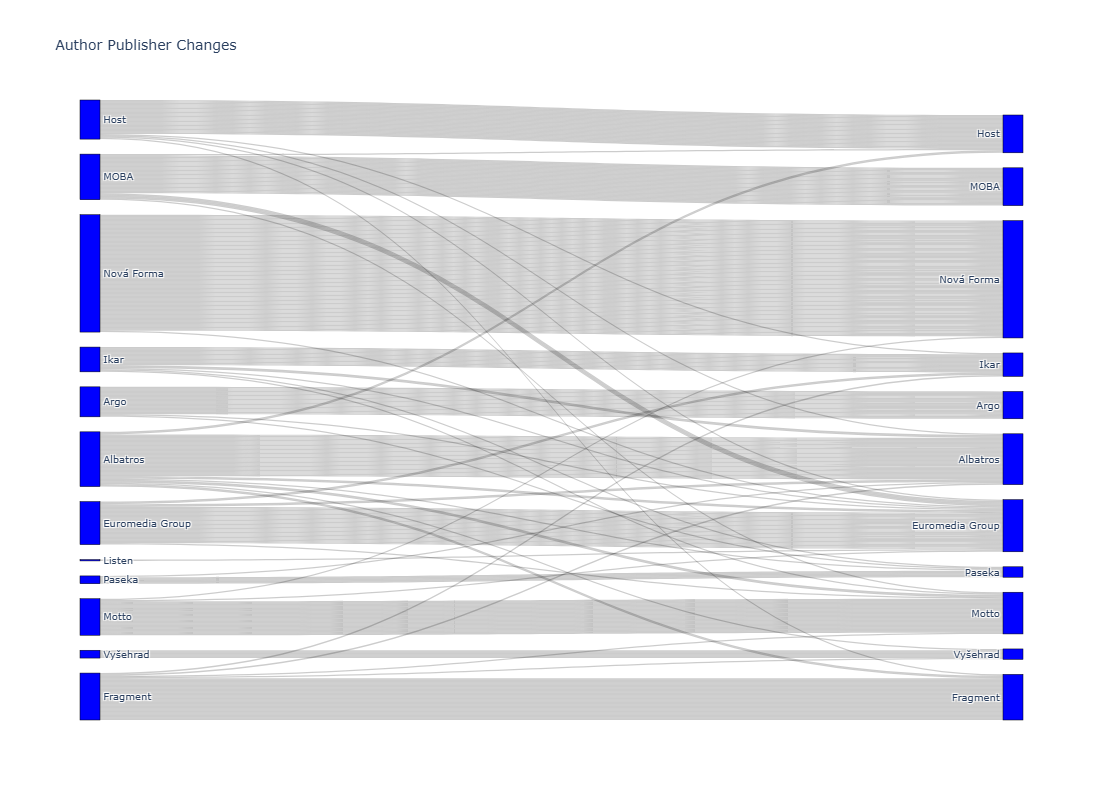

In [249]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = node_labels,
      color = "blue"
    ),
    link = dict(
      source = source_indices,
      target = target_indices,
      value = value
  ))])

fig.update_layout(title_text="Author Publisher Changes", font_size=10, height=800)
fig.show()

In [233]:
vyber[vyber['autorstvo'].str.contains('Kašp')]

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,nakladatelstvi,kolikata_kniha
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20233549616,2023.0,Fosilie,Kašpárek Michal,jx20100301005,230925s2023 xr g 000 f cze,[978-80-7637-400-3],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-31)]",[aut],[jx20100301005],"[Kašpárek, Michal,]",[1984-],None,[Fosilie /],[Michal Kašpárek],None,None,None,[Vydání první],None,None,None,None,None,None,None,[V Praze :],"[Paseka,]",[2023],[1],[183 stran ;],None,[20 cm],None,None,None,"[Tři generace, tři životní názory a postoje. D...","[Děda, bývalý učitel tělocviku, vnímá, že svět...",None,None,None,None,None,None,None,None,None,"[české romány, Czech fiction]",None,None,None,None,None,None,None,None,None,None,None,nam a22 i 4500,Paseka,2.0


## Debutantská a přebírací nakladatelství

In [262]:
df12 = df[df['rok'] >= 2014]
df12 = df12[df12['autorstvo_kod'].isin(df12[df12['kolikata_kniha'] == 1]['autorstvo_kod'].drop_duplicates().to_list())]
df12 = df12[df12['autorstvo_kod'].isin(df12[df12['kolikata_kniha'] == 2]['autorstvo_kod'].drop_duplicates().to_list())]
len(df12)

4469

In [276]:
(df12[df12['kolikata_kniha'] == 1].groupby('nakladatelstvi').size() / df12[df12['kolikata_kniha'] == 2].groupby('nakladatelstvi').size()).nlargest(20)

nakladatelstvi
Beletris                     6.500000
ArtPorte                     3.000000
Baobab                       3.000000
Fantom Print                 3.000000
Revolver Revue               3.000000
Alfa-Omega                   2.666667
Tigris, spol. s r.o.         2.500000
Šimon Ryšavý                 2.250000
ASKI                         2.000000
Andrea Sasínová - Šuplík     2.000000
Balt-East                    2.000000
BizBooks                     2.000000
Credit-plus s.r.o.           2.000000
Dokořán                      2.000000
KANT                         2.000000
Katolický týdeník            2.000000
Laguna                       2.000000
Lika klub                    2.000000
Miloslav Krist - ArtKrist    2.000000
Nakladatelství TN            2.000000
dtype: float64

In [274]:
(df12[df12['kolikata_kniha'] == 1].groupby('nakladatelstvi').size() / df12[df12['kolikata_kniha'] == 2].groupby('nakladatelstvi').size()).nsmallest(20)

nakladatelstvi
Dobrovský s.r.o.       0.333333
Paseka                 0.333333
Protimluv              0.333333
Práh                   0.333333
Rosier                 0.333333
TN                     0.333333
H.R.G. spol. s r.o.    0.363636
Běžíliška              0.400000
Mystery Press          0.400000
Nová Forma, s.r.o.     0.428571
Argo                   0.500000
Burian a Tichák        0.500000
Bylo nebylo            0.500000
Cattacan               0.500000
Gorgona                0.500000
Grada Publishing       0.500000
Knihkupectví CZ        0.500000
Lirego                 0.500000
Malvern                0.500000
Meander                0.500000
dtype: float64